In [634]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [823]:
#датасет
data, target, coef = sklearn.datasets.make_regression(n_samples = 1000, n_features = 2, n_informative=2, n_targets=1, noise =7, coef=True, random_state =2 )

In [824]:
data[0,:]

array([ 0.37879447, -0.61837549])

In [825]:
sum(data[:, 1])/1000

0.02045785219888101

In [826]:
mean = np.mean(data, axis = 0)
std = np.mean(data, axis = 0)
print(mean, std)


[-0.0790127   0.02045785] [-0.0790127   0.02045785]


In [827]:
# Проведем стандартизацию признаков:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = (data[i, j] - mean[j]) / std[j]

In [828]:
data[0,:]

array([ -5.79409582, -31.22680382])

In [829]:
def mse(X, w, y):
    mse = sum((y - X.dot(w))**2)/data.shape[0]
    return mse
    

In [673]:
# начальные значения 
w = np.zeros(2)
eta = 1e-4
max_iter = 10000
delta_stop = 1e-5
delta = 1e+5
n = data.shape[0]

In [674]:
# градиентный спуск
mse_gd = []
for iter in range(max_iter):
    
    err = mse(data, w, target)
    mse_gd.append(err)
    w_new = w - eta * 2 / n * (np.dot(data.T, (data.dot(w) - target)))

    delta = mse(data, w, target) - mse(data, w_new, target)

    w = w_new
    
    if iter > 1 and delta < delta_stop:
        print(iter, w_new, err)
        break
            

269 [-4.91319048  1.39873099] 63.72714390186238


In [684]:
# начальные значения 
w = np.zeros(2)
eta = 1e-2
max_iter = 10000
delta_weigth_stop = 1e-6
delta_weigth = 1e+5
n = data.shape[0]

In [685]:
# стохастический градиентный спуск
mse_sgd = []
for iter in range(max_iter):
    i = np.random.randint(0, data.shape[0])
    
    err = mse(data, w, target) 
    mse_sgd.append(err)
    
    w_new = w - eta * 2/n * (np.dot(data[i].T, (data[i].dot(w) - target[i])))

    delta_weigth = np.linalg.norm(w_new - w, ord=2)


    w = w_new
    if iter > 1 and delta_weigth < delta_weigth_stop:
        print(iter, w_new, err)
        break
   
 

7901 [-4.92840125  1.33951816] 72.01279969090373


(0, 500)

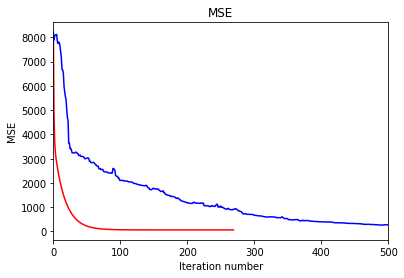

In [693]:
plt.plot(range(len(mse_gd)), mse_gd, color='r')
plt.plot(range(len(mse_sgd)), mse_sgd, color='b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0,500)

In [687]:
# Вывод: скорость сходимости градиентного спуска выше (на графике - красным)

In [870]:
def mse_L2(X, w, y, coef_L2):
    mse_L2 = sum((y - X.dot(w))**2)/data.shape[0] + coef_L2 * np.sum(w ** 2)
    return mse_L2

In [871]:
# начальные значения 
w = np.zeros(2)
eta = 1e-3
max_iter = 1000
delta_stop = 1e-4
delta = 1e+5
n = data.shape[0]
coef_L2 = 0.01

In [872]:
# градиентный спуск + l2 регуляризация
mse_gd_L2 = []
for iter in range(max_iter):
    
    err = mse_L2(data, w, target, coef_L2)
    mse_gd_L2.append(err)
    w_new = w - eta * 2 / n * (np.dot(data.T, (data.dot(w) - target))) - 2  * coef_L2 * w

    delta = mse_L2(data, w, target, coef_L2) - mse_L2(data, w_new, target, coef_L2)
#     delta = np.abs(delta)

    w = w_new
    
    if iter % 100 == 0:
        print(iter, w_new, err, delta)
    
#     if iter > 1 and delta < delta_stop:
#         print(iter, w_new, err, abs(delta))
#         break

0 [-1.48855116  6.42109124] 8211.927865021598 -53371.46147971678
100 [3.19318476e+55 4.79270771e+57] 3.9092774708523024e+117 -4.999720567479016e+118
200 [3.03004574e+112 4.54784946e+114] 3.520033291657635e+231 -4.5019016884147e+232
300 [2.87524146e+169 4.31550096e+171] inf nan


C:\Users\maslenicyna\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\maslenicyna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\maslenicyna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


400 [2.72834609e+226 4.09502309e+228] inf nan
500 [2.58895556e+283 3.88580938e+285] inf nan
600 [nan nan] nan nan
700 [nan nan] nan nan
800 [nan nan] nan nan
900 [nan nan] nan nan


In [873]:
# начальные значения + L2 регуляризация
w = np.zeros(2)
eta = 1e-2
max_iter = 10000
delta_weigth_stop = 1e-6
delta_weigth = 1e+5
n = data.shape[0]
coef_L2 = 0.01

In [874]:
# стохастический градиентный спуск
mse_sgd_L2 = []
for iter in range(max_iter):
    i = np.random.randint(0, data.shape[0])
    
    err = mse(data, w, target) 
    mse_sgd_L2.append(err)
    
    w_new = w - (eta * 2/n * (np.dot(data[i].T, (data[i].dot(w) - target[i]))) + 2 * coef_L2 * w)

    delta_weigth = np.linalg.norm(w_new - w, ord=2)


    w = w_new
    
    if iter > 1 and delta_weigth < delta_weigth_stop:
        print(iter, w_new, err, delta_weigth)
        break

Text(0, 0.5, 'MSE')

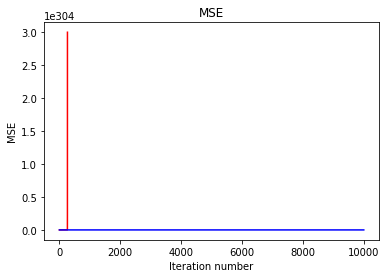

In [875]:
plt.plot(range(len(mse_gd_L2)), mse_gd_L2, color='r')
plt.plot(range(len(mse_sgd_L2)), mse_sgd_L2, color='b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')